In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [75]:
data = fetch_california_housing()
X_raw = data.data
Y = data.target.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

In [76]:
m = X_scaled.shape[0]
ones = np.ones((m, 1))
X = np.hstack([ones, X_scaled])
Q = np.zeros([X.shape[1], 1])
def grad(Xi, Yi, Q):
    Hi = Xi @ Q
    return (Hi - Yi)*Xi.T
epochs = 10
iters = X.shape[0]
alpha = 1e-4
i = 0
Qz = [0 + 0j]
while(i < epochs):
    j = 0
    while(j < iters):
        Xj = X[[j], :]
        Yj = Y[[j], :]
        Q -= alpha*grad(Xj, Yj, Q)
        zn = Q[0, 0] + Q[1, 0]*1j
        Qz.append(zn)
        j += 1
    i += 1
    alpha *= 0.9

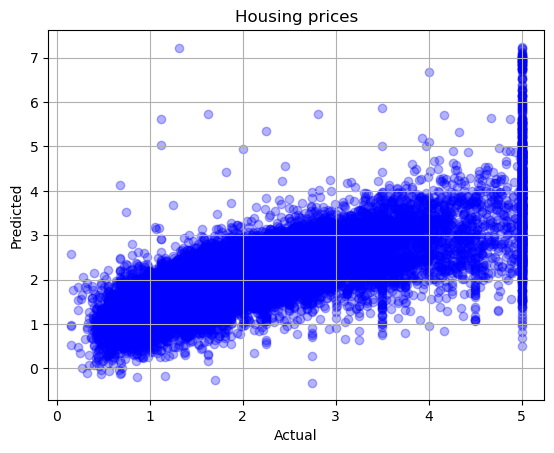

In [77]:
H = X @ Q
plt.scatter(Y, H, alpha = 0.3, color = "Blue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Housing prices")
plt.grid(True)
plt.show()

In [78]:
print(Q[0, 0])
print(Q[1, 0])

2.0558795022687257
0.8268951697465624


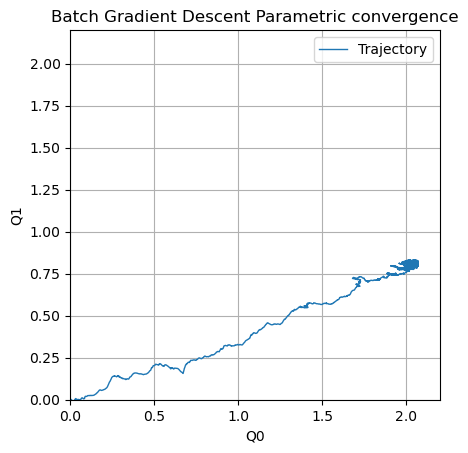

In [80]:
df = pd.DataFrame(Qz, columns = ["Z"])
df["Re"] = df["Z"].apply(lambda x: x.real)
df["Im"] = df["Z"].apply(lambda x: x.imag)
plt.plot(df["Re"], df["Im"], label="Trajectory", linewidth=1)
plt.xlabel("Q0")
plt.ylabel("Q1")
plt.title("Batch Gradient Descent Parametric convergence")
plt.xlim([0, 2.2])
plt.ylim([0, 2.2])
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.show()